<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Autoregressive-(AR)-Model" data-toc-modified-id="Autoregressive-(AR)-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Autoregressive (AR) Model</a></span><ul class="toc-item"><li><span><a href="#Properties" data-toc-modified-id="Properties-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Properties</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#Moving-Average-(MA)-Model" data-toc-modified-id="Moving-Average-(MA)-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Moving Average (MA) Model</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#ARMA-Model" data-toc-modified-id="ARMA-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ARMA Model</a></span><ul class="toc-item"><li><span><a href="#Higher-Order" data-toc-modified-id="Higher-Order-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Higher Order</a></span></li></ul></li></ul></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(13)

# Autoregressive (AR) Model

## Properties

Formula: $Y(t) = \mu + \phi * Y(t-1)+\epsilon(t)$

> $\phi = 0$: simply the white noise model (mean of $\mu$)
>
> $\phi \lt 0$: oscillates
>
> $\phi \gt 0$: previous points correlate with past (**autocorrelated**)

## Example

In [12]:
def create_ar_time_series (phi, epsilon,mu = 7, periods = n_pts):
    # Dates & white noise (epsilon)
    date_vals = pd.date_range(start='1/1/2015', periods=n_pts)
    epsilon = np.random.normal(avg,std,n_pts)

    #
    vals = []
    y = 0
    for e in epsilon:
        y = y * phi  + e + mu
        vals.append(y)
   
    
    time_series =  pd.Series(vals, index=date_vals)
    return time_series

In [13]:
avg = 0
std = 4
n_pts = 100

epsilon = np.random.normal(avg,std,n_pts)

In [14]:
phis = [
    1.01,
    0.9,
    0.7,
    0,
    -0.9,
    -1,
    -1.1
]

time_series_all_phis = pd.DataFrame()
for phi in phis:
    time_series_all_phis[f'phi = {phi}'] = create_ar_time_series(phi, epsilon)

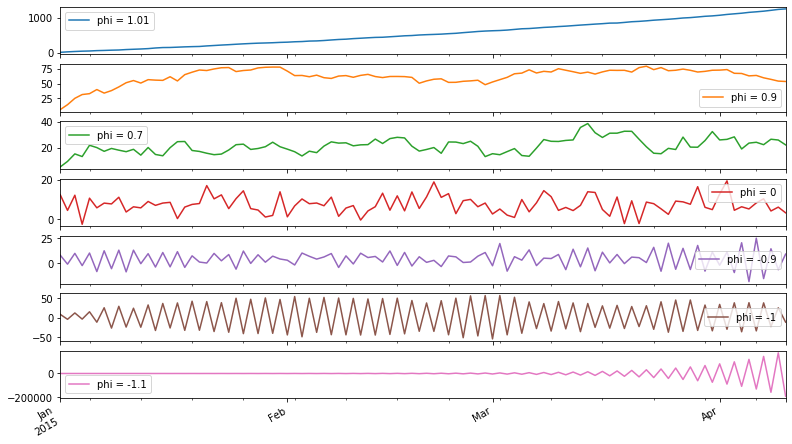

In [19]:
# Plot yearly froups as subplots
time_series_all_phis.plot(figsize = (13,8), subplots = True, legend = True)
plt.show()

# Moving Average (MA) Model

Formula: $Y(t) = \mu + \theta * \epsilon(t-1)+\epsilon(t)$

> $\theta = 0$: simply the white noise model (mean of $\mu$)
>
> $\theta \lt 0$: oscillates
>
> $\theta \gt 0$: previous points correlate with past (**autocorrelated**)

## Example

In [23]:
def create_ma_time_series (phi, epsilon,mu = 7, periods = n_pts):
    # Dates & white noise (epsilon)
    date_vals = pd.date_range(start='1/1/2015', periods=n_pts)
    epsilon = np.random.normal(avg,std,n_pts+1)

    #
    vals = []
    y = 0
    for i in range(len(epsilon)-1):
        y = epsilon[i] * theta  + epsilon[i+1] + mu
        vals.append(y)
    
    
    time_series =  pd.Series(vals, index=date_vals)
    return time_series

In [24]:
avg = 0
std = 4
n_pts = 100

epsilon = np.random.normal(avg,std,n_pts)

thetas = [
    1.9,
    0.2,
    0,
    -0.5
]

time_series_all_thetas = pd.DataFrame()
for theta in thetas:
    time_series_all_thetas[f'theta = {theta}'] = create_ma_time_series(theta, epsilon)

In [25]:
time_series_all_thetas.head()

,theta = 1.9,theta = 0.2,theta = 0,theta = -0.5
2015-01-01,13.204011,10.063597,5.039843,14.202191
2015-01-02,-3.965851,1.326006,6.439414,3.082076
2015-01-03,-0.287653,1.154595,8.801755,14.661602
2015-01-04,15.190017,8.522622,6.846579,0.545844
2015-01-05,-0.738947,7.399238,4.078139,8.068478


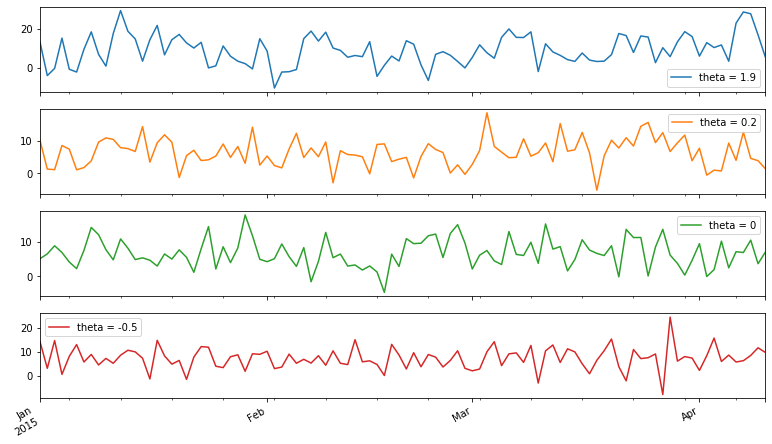

In [26]:
# Plot yearly froups as subplots
time_series_all_thetas.plot(figsize = (13,8), subplots = True, legend = True)
plt.show()

# ARMA Model

Combine them together; can have both regression on past values (AR) and previous errors affect future errors (MA)

Formula: $Y(t) = \mu + \epsilon(t) + \phi * Y(t-1) +  \theta * \epsilon(t-1)$


## Higher Order

ARMA(2,1) yields

$$Y(t) = \mu + \epsilon(t) + \phi_2 * Y(t-2) + \phi_1 * Y(t-1) +  \theta * \epsilon(t-1)$$